# **Deep Learning Lab: Transfer Learning**

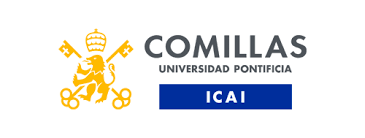

***

## Import packages

In [1]:
from cnn import CNN
import torchvision
from cnn import load_data
from cnn import load_model_weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import json

## Model and data loading

In [2]:
# Pytorch has many pre-trained models that can be used for transfer learning
classification_models = torchvision.models.list_models(module=torchvision.models)
print(classification_models)

['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'squeezenet1_0

In [7]:
# Load data and model 
train_dir = '../dataset/training'
valid_dir = '../dataset/validation'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=64, 
                                                    img_size=224) # ResNet50 requires 224x224 images
model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes, device= device, unfreezed_layers=5).to(device)

cuda:0


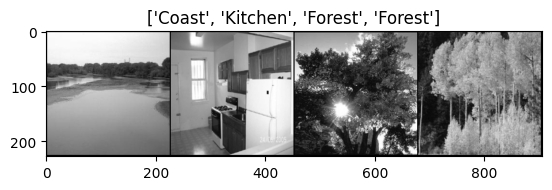

In [8]:
# Visualize a few images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(valid_loader.dataset[i][1])
out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])

## Train

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=.1e-4)
criterion = nn.CrossEntropyLoss()
history = model.train_model(train_loader, valid_loader, optimizer, criterion, epochs=500)

Epoch 1/100 - Train Loss: 2.3747, Train Accuracy: 0.4556
Epoch 1/100 - Validation Loss: 2.2450, Validation Accuracy: 0.5747
Epoch 2/100 - Train Loss: 2.1691, Train Accuracy: 0.6543
Epoch 2/100 - Validation Loss: 2.1372, Validation Accuracy: 0.6820
Epoch 3/100 - Train Loss: 2.1394, Train Accuracy: 0.6851
Epoch 3/100 - Validation Loss: 2.1095, Validation Accuracy: 0.7113
Epoch 4/100 - Train Loss: 2.1048, Train Accuracy: 0.7159
Epoch 4/100 - Validation Loss: 2.0626, Validation Accuracy: 0.7500
Epoch 5/100 - Train Loss: 2.1099, Train Accuracy: 0.7095
Epoch 5/100 - Validation Loss: 2.0459, Validation Accuracy: 0.7653
Epoch 6/100 - Train Loss: 2.1059, Train Accuracy: 0.7122
Epoch 6/100 - Validation Loss: 2.0651, Validation Accuracy: 0.7460
Epoch 7/100 - Train Loss: 2.1003, Train Accuracy: 0.7189
Epoch 7/100 - Validation Loss: 2.0411, Validation Accuracy: 0.7720
Epoch 8/100 - Train Loss: 2.0961, Train Accuracy: 0.7162
Epoch 8/100 - Validation Loss: 2.0390, Validation Accuracy: 0.7760
Epoch 9/

In [10]:
model.save('resnet50-final')

## Predict

#### Load model

In [ ]:
# Load model
model_weights = load_model_weights('resnet50-1epoch')
my_trained_model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes).to(device)
my_trained_model.load_state_dict(model_weights)

<All keys matched successfully>

## Results

In [ ]:
predicted_labels = my_trained_model.predict(valid_loader)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\raul\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\raul\AppData\Local\Temp\ipykernel_3992\2100543753.py", line 1, in <module>
    predicted_labels = my_trained_model.predict(valid_loader)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\raul\Documents\MEGAsync\2MIT\MachineLearning\Practicas_DeepLearning_2024-main\03TransferLearning\cnn.py", line 159, in predict
  File "c:\Users\raul\.conda\envs\noestructurados\Lib\site-packages\torch\nn\modules\module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\raul\.conda\envs\noestructurados\Lib\site-packages\torch\nn\modules\module.py", line 1520, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

In [ ]:
# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(predicted_labels[i])

out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])


NameError: name 'predicted_labels' is not defined